In [3]:
import pandas as pd
df = pd.read_csv("data_v1.csv", engine="python", on_bad_lines='skip')
print("✅ Loaded rows:", len(df))
import pandas as pd

# Load the dataset
df = pd.read_csv("data_v1.csv", engine="python", on_bad_lines='skip')
print("✅ Loaded rows:", len(df))

# Display the first 5 rows to preview the data
df.head(20)

# Check the shape (rows, columns)
print("Shape (rows, columns):", df.shape)

# Check column names and data types
df.info()
df.describe()

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# create new col CompanyGroupID
df['CompanyGroupID'] = df['Company']


# select only missing row Company
mask_missing_company = df['Company'].isnull()

# List all columns
print("All columns:", df.columns.tolist())

✅ Loaded rows: 318477
✅ Loaded rows: 318477
Shape (rows, columns): (318477, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB
Missing values per column:
Id        

In [4]:
# Define city-to-state mapping
city_to_state = {
    # New South Wales (NSW)
    'sydney': 'NSW', 'albury': 'NSW', 'armidale': 'NSW', 'bathurst': 'NSW', 'blue mountains': 'NSW',
    'broken hill': 'NSW', 'campbelltown': 'NSW', 'cessnock': 'NSW', 'dubbo': 'NSW', 'gosford': 'NSW',
    'goulburn': 'NSW', 'grafton': 'NSW', 'griffith': 'NSW', 'lithgow': 'NSW', 'lismore': 'NSW',
    'liverpool': 'NSW', 'maitland': 'NSW', 'newcastle': 'NSW', 'orange': 'NSW', 'parramatta': 'NSW',
    'penrith': 'NSW', 'queanbeyan': 'NSW', 'tamworth': 'NSW', 'wagga wagga': 'NSW', 'wollongong': 'NSW',
    'blacktown': 'NSW', 'canada bay': 'NSW', 'fairfield': 'NSW', 'hawkesbury': 'NSW',
    'lake macquarie': 'NSW', 'randwick': 'NSW', 'ryde': 'NSW', 'shellharbour': 'NSW',
    'shoalhaven': 'NSW', 'willoughby': 'NSW', 'bankstown': 'NSW', 'botany bay': 'NSW',
    'canterbury': 'NSW', 'greater taree': 'NSW', 'holroyd': 'NSW', 'hurstville': 'NSW',
    'rockdale': 'NSW',

    # Victoria (VIC)
    'melbourne': 'VIC', 'ararat': 'VIC', 'bairnsdale': 'VIC', 'ballarat': 'VIC', 'benalla': 'VIC',
    'bendigo': 'VIC', 'dandenong': 'VIC', 'frankston': 'VIC', 'geelong': 'VIC', 'hamilton': 'VIC',
    'horsham': 'VIC', 'latrobe': 'VIC', 'melton': 'VIC', 'mildura': 'VIC', 'sale': 'VIC',
    'shepparton': 'VIC', 'swan hill': 'VIC', 'wangaratta': 'VIC', 'warrnambool': 'VIC', 'wodonga': 'VIC',

    # Queensland (QLD)
    'brisbane': 'QLD', 'bundaberg': 'QLD', 'cairns': 'QLD', 'caloundra': 'QLD', 'gladstone': 'QLD',
    'gold coast': 'QLD', 'gympie': 'QLD', 'hervey bay': 'QLD', 'ipswich': 'QLD', 'logan': 'QLD',
    'mackay': 'QLD', 'maryborough': 'QLD', 'mount isa': 'QLD', 'rockhampton': 'QLD',
    'sunshine coast': 'QLD', 'toowoomba': 'QLD', 'townsville': 'QLD', 'charters towers': 'QLD',
    'redcliffe': 'QLD', 'redland': 'QLD', 'thuringowa': 'QLD', 'warwick': 'QLD',

    # South Australia (SA)
    'adelaide': 'SA', 'mount barker': 'SA', 'mount gambier': 'SA', 'murray bridge': 'SA',
    'port adelaide': 'SA', 'port augusta': 'SA', 'port pirie': 'SA', 'port lincoln': 'SA',
    'victor harbor': 'SA', 'whyalla': 'SA',

    # Western Australia (WA)
    'perth': 'WA', 'albany': 'WA', 'bunbury': 'WA', 'busselton': 'WA', 'fremantle': 'WA',
    'geraldton': 'WA', 'joondalup': 'WA', 'kalgoorlie': 'WA', 'karratha': 'WA', 'mandurah': 'WA',
    'rockingham': 'WA', 'armadale': 'WA', 'bayswater': 'WA', 'canning': 'WA', 'cockburn': 'WA',
    'gosnells': 'WA', 'kalamunda': 'WA', 'kwinana': 'WA', 'melville': 'WA', 'nedlands': 'WA',
    'south perth': 'WA', 'stirling': 'WA', 'subiaco': 'WA', 'swan': 'WA', 'wanneroo': 'WA',

    # Tasmania (TAS)
    'hobart': 'TAS', 'burnie': 'TAS', 'devonport': 'TAS', 'launceston': 'TAS', 'clarence': 'TAS',
    'glenorchy': 'TAS',

    # ACT
    'canberra': 'ACT',

    # Northern Territory (NT)
    'darwin': 'NT', 'palmerston': 'NT', 'alice springs': 'NT', 'katherine': 'NT'
}

In [5]:
# Helper function to get state from city
def get_state(location):
    if pd.isna(location):
        return 'Unknown'
    location = location.lower()

    # cut "&" ie "Hervey Bay & Fraser Coast" → "hervey bay"
    location = location.split("&")[0].strip()

    for city, state in city_to_state.items():
        if city in location:
            return state
    return 'Unknown'

# Apply function to create new column 'State'
df['State'] = df['Location'].apply(get_state)

df[['Location', 'State']].sample(10)

def infer_company(row):
    classification = row['Classification']
    subclassification = row['SubClassification']
    location = row['Location']
    requirement = row['Requirement']

    if pd.isna(classification): classification = ''
    if pd.isna(subclassification): subclassification = ''
    if pd.isna(location): location = ''
    if pd.isna(requirement): requirement = ''
    
    # Find state
    state = get_state(location)

    # Define mapping rules
    clinic_keywords = ['Dental', 'Nursing', 'Healthcare & Medical', 'Medical']
    mechanic_keywords = ['Electricians', 'Plumbers']
    store_keywords = ['Sales Representatives/Consultants', 'Trades & Services', 'Retail', 'Sales']
    edu_keywords = ['Education & Training', 'Childcare']
    company_keywords = [
        'Manufacturing', 'Transport', 'Logistics', 'Administration',
        'Human Resources', 'Recruitment', 'Accounting', 
        'Legal', 'Information & Communication Technology', 
        'CEO & General Management', 'Marketing', 'Office Support',
        'Call Centre', 'Customer Service', 'Advertising', 'Management']
    restaurant_keywords = ['Hospitality', 'Waiting Staff']
    bank_keywords = ['Banking', 'Banking - Retail/Branch']
    government_keywords = ['Government', 'Community Services', 'Welfare', 'Policy']
    industry_keywords = ['Architecture', 'Mining', 'Engineer', 'Construction', 'Oil', 'Gas', 'Energy', 'Design & Architecture']

    # Lower priority matching rules
    if any(keyword in classification or keyword in subclassification for keyword in clinic_keywords):
        return f'Clinic_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in mechanic_keywords):
        return f'MechanicService_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in store_keywords):
        return f'Store_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in edu_keywords):
        return f'EducationalInstitution_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in company_keywords):
        return f'Company_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in restaurant_keywords):
        return f'Restaurant_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in bank_keywords):
        return f'Bank_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in government_keywords):
        return f'Government_{state}'
    if any(keyword in classification or keyword in subclassification for keyword in industry_keywords):
        return f'IndustrialSector_{state}'

    # If no matching
    if state != 'UnknownState':
        return 'Nan'

In [6]:
# Apply function to NaN Company rows
df.loc[mask_missing_company, 'CompanyGroupID'] = df[mask_missing_company].apply(infer_company, axis=1)

print("✅ CompanyGroupID created successfully based on State Mapping!")

✅ CompanyGroupID created successfully based on State Mapping!


In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

df.info()

Missing values per column:
Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
CompanyGroupID            0
State                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  obje

In [9]:
# Save cleaned dataframe
df.to_csv('data_withComGID.csv', index=False)

In [11]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,CompanyGroupID,State
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,Aldi Stores,NSW
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,Aldi Stores,Unknown
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,LB Creative Pty Ltd,QLD
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,Anaconda Group Pty Ltd,NSW
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,Commonwealth Bank - Business & Private Banking,NSW


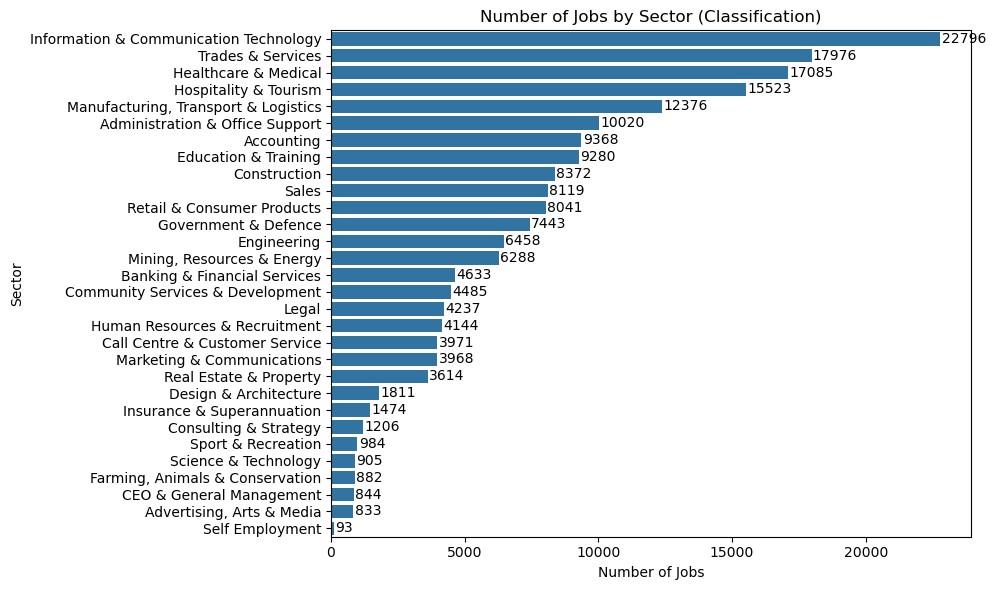

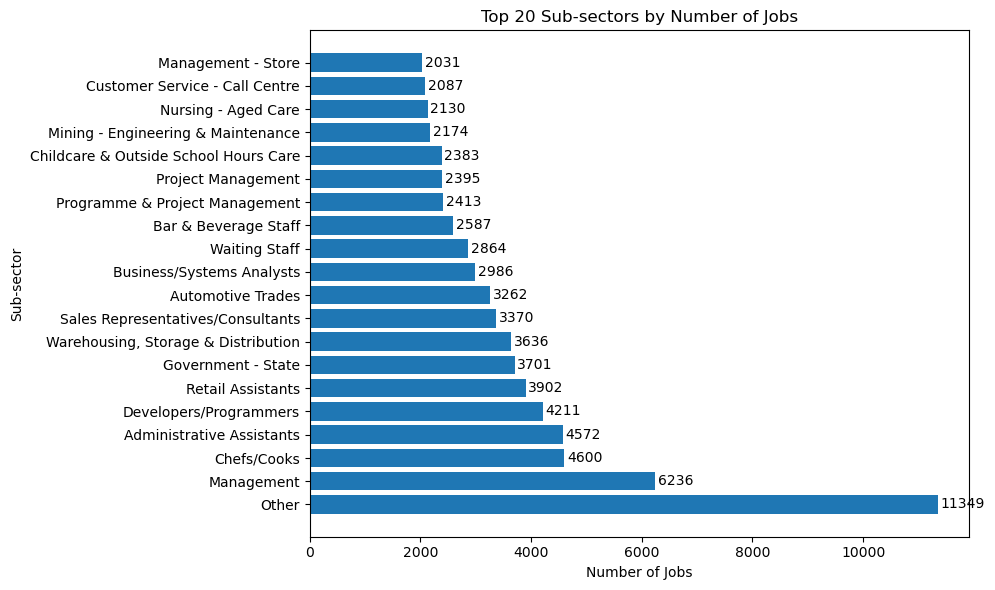

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot number of jobs by sector (Classification) with labels
plt.figure(figsize=(10, 6))
ax1 = sns.countplot(y='Classification', data=df, order=df['Classification'].value_counts().index)
plt.title('Number of Jobs by Sector (Classification)')
plt.xlabel('Number of Jobs')
plt.ylabel('Sector')

for p in ax1.patches:
    count = int(p.get_width())
    ax1.annotate(str(count), (p.get_width() + 50, p.get_y() + p.get_height() / 2),
                 ha='left', va='center')

plt.tight_layout()
plt.show()

# Plot top 20 most common sub-sectors (SubClassification) with labels
top_subs = df['SubClassification'].value_counts().head(20)
fig, ax2 = plt.subplots(figsize=(10, 6))
bars = ax2.barh(top_subs.index, top_subs.values)
ax2.set_title('Top 20 Sub-sectors by Number of Jobs')
ax2.set_xlabel('Number of Jobs')
ax2.set_ylabel('Sub-sector')


for bar in bars:
    width = bar.get_width()
    ax2.text(width + 50, bar.get_y() + bar.get_height() / 2, str(int(width)),
             va='center', ha='left')

plt.tight_layout()
plt.show()


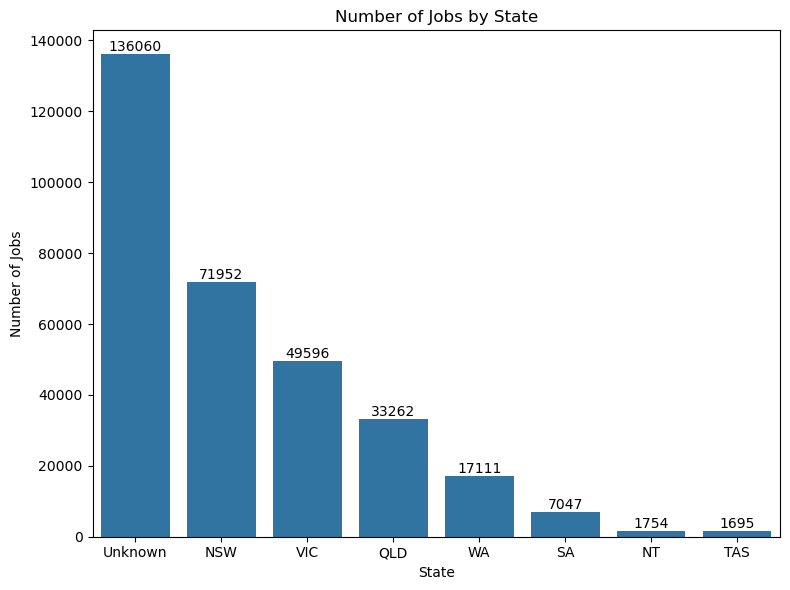

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.title('Number of Jobs by State')
plt.xlabel('State')
plt.ylabel('Number of Jobs')

for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(str(count), 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


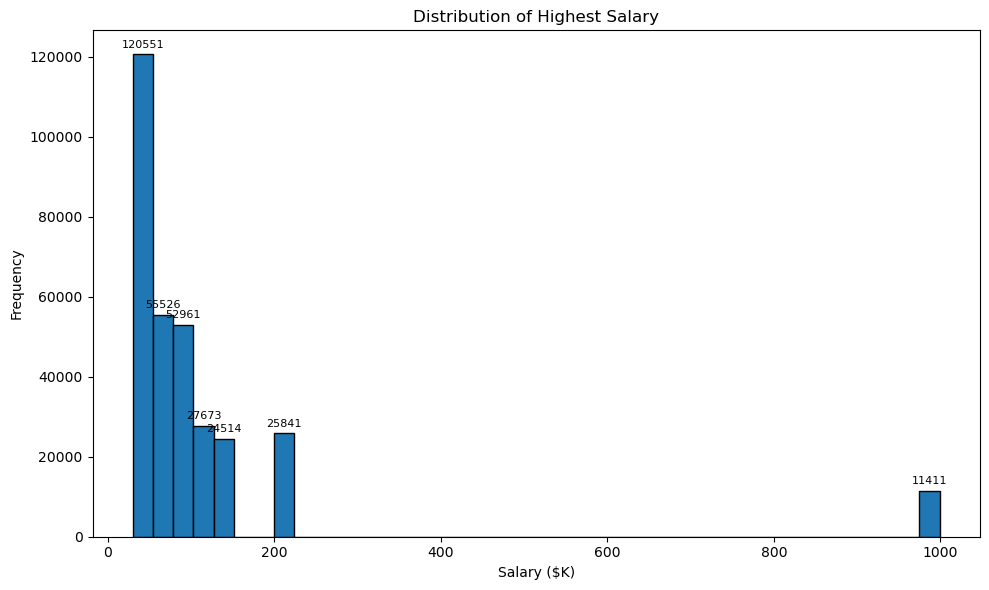

In [37]:
import matplotlib.pyplot as plt

salary_k = df['HighestSalary'] 

# Plot histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(salary_k, bins=40, edgecolor='black')

plt.title('Distribution of Highest Salary')
plt.xlabel('Salary ($K)')  
plt.ylabel('Frequency')

for count, x in zip(counts, bins):
    if count > 0:
        plt.text(x + (bins[1] - bins[0]) / 2, count + max(counts)*0.01,
                 str(int(count)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
